In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import editdistance

In [6]:
import sys
# sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [7]:
%reload_ext autoreload
%autoreload 2
from utils.sequence_utils import *
from models.Theoretical_models import *
from models.Noise_wrapper import *
from exploration_strategies.CE import *
# from exploration_strategies.RLSVI import *
from utils.landscape_utils import *
from models.RNA_landscapes import *
from models.Multi_dimensional_model import *

ModuleNotFoundError: No module named 'RNA'

In [202]:
RAA="UGCA" #alphabet
length=40

In [203]:
wt=generate_random_sequences(length,1,alphabet=RAA)[0]
wt

'GUGGGUCGUGAAGCCAUAUUAUUCCACGCCGCAGCAGCAG'

In [204]:
#make a simple folding landscape starting at wt
landscape1=RNA_landscape(wt)

In [205]:
noise_alpha=1
batch_size=100
virtual_per_measure_ratio=15
temperature=0.1
generations=20

In [206]:
# there are multiple abstract "noise models" you can use, or you can try to train your own model, using skM
noisy_landscape=Noise_wrapper(landscape1,noise_alpha=noise_alpha)
noisy_landscape2=Noise_wrapper(landscape1,noise_alpha=noise_alpha)
#noisy_landscape=Gaussian_noise_landscape(base_landscape,noise_alpha=0.15)
#noisy_landscape=DF_noise_landscape(base_landscape,noise_alpha=0.5)

In [207]:
initial_genotypes=list(set([wt]+[generate_random_mutant(wt,0.05,RAA) for i in range(batch_size*10)]))[:batch_size]
len(initial_genotypes)

100

In [208]:
noisy_landscape.reset()
noisy_landscape.measure_true_landscape(initial_genotypes)
noisy_landscape.natural_mode=False
noisy_landscape.local_mode=False
noisy_landscape.cost

100

In [209]:
noisy_landscape2.reset()
noisy_landscape2.measure_true_landscape(initial_genotypes)
noisy_landscape2.natural_mode=False
noisy_landscape2.local_mode=False
noisy_landscape2.cost

100

In [210]:
eCE=CE(noisy_landscape,initial_genotypes,wt,\
       alphabet=RAA,batch_size=batch_size,recomb_rate=0.0, \
       temperature=temperature,virtual_screen=virtual_per_measure_ratio)

eRLSVI=RLSVI(noisy_landscape2,initial_genotypes,wt,\
       alphabet=RAA,batch_size=batch_size,recomb_rate=0.0, \
       temperature=temperature,virtual_screen=virtual_per_measure_ratio)

In [213]:
news=[]
while noisy_landscape2.cost<generations*batch_size:
    news.append(eRLSVI.pick_action())

    print(noisy_landscape2.cost,eRLSVI.top_sequence[-1][0])
    news=[]

711 0.22470588684082032


KeyboardInterrupt: 

In [212]:
news=[]
while noisy_landscape.cost<generations*batch_size:
    news.append(eCE.pick_action())

    print(noisy_landscape.cost,eCE.top_sequence[-1][0])
    news=[]

200 0.2070588280172909
300 0.27764706331140854
400 0.32823528962976795
500 0.37058823529411766
600 0.37058823529411766
700 0.3847058913286994
800 0.4141176560345818
900 0.42470586440142466
1000 0.4858823439654182
1100 0.4858823439654182
1200 0.4858823439654182
1300 0.49411764705882355
1400 0.4964705972110524
1500 0.5023529501522288
1600 0.5058823529411764
1700 0.5317647148581112
1800 0.5317647148581112
1900 0.5470588235294118
2000 0.5470588235294118


AttributeError: 'RLSVI' object has no attribute 'top_sequence'

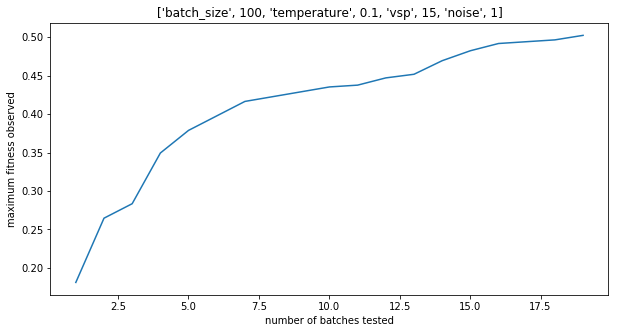

In [30]:
plt.figure(figsize=(10,5))
#plt.xscale("log")
plt.title(["batch_size",batch_size,"temperature",temperature,"vsp",virtual_per_measure_ratio,"noise",noise_alpha])
plt.xlabel("number of batches tested")
plt.ylabel("maximum fitness observed")
plt.plot([t[2]/batch_size for t in eCE.top_sequence[1:]],[t[0] for t in eCE.top_sequence[1:]],label="eCE")
plt.plot([t[2]/batch_size for t in eRLSVI.top_sequence[1:]],[t[0] for t in eRLSVI.top_sequence[1:]],label="eRLSVI")
plt.legend()
plt.xticks(range(generations));

In [31]:
from functools import reduce
combined_func=lambda z: reduce(lambda x, y: x*y,z)

In [32]:
target,target2=generate_random_sequences(length,2,alphabet=RAA)[:2]
target,target2

('CUCAUACCUCACACGUCGAAAUUAGUUAGGGCACGAUAUA',
 'AGCGUGGCUCGCGUAAUAAGAUAAUGACAGGAUUAUGCGA')

In [33]:
#You can also make complicated "composite" landscapes
energy_landscape=RNA_landscape(wt,threshold=10) #setting a threshold makes the landscape binary
binding_landscape=RNA_landscape_Binding(target,norm_value=100)
binding_landscape2=RNA_landscape_Binding(target2,norm_value=100)

base_landscape=Multi_dimensional_model([energy_landscape,binding_landscape,binding_landscape2],combined_func=combined_func)

In [34]:
noisy_landscape=Noise_wrapper(base_landscape,noise_alpha=noise_alpha)


In [35]:
noisy_landscape.reset()
noisy_landscape.measure_true_landscape(initial_genotypes)
noisy_landscape.natural_mode=False
noisy_landscape.local_mode=False
noisy_landscape.cost

100

In [36]:
eCE=CE(noisy_landscape,initial_genotypes,wt,\
       alphabet=RAA,batch_size=batch_size,recomb_rate=0.0, \
       temperature=temperature,virtual_screen=virtual_per_measure_ratio)


In [37]:
news=[]
while noisy_landscape.cost<generations*batch_size:
    news.append(eCE.pick_action())

    print(noisy_landscape.cost,eCE.top_sequence[-1][0])
    news=[]

200 0.05151999912261963
300 0.055684999179840086
400 0.06726799910736081
500 0.08126999759674072
600 0.08763999786376955
700 0.0950619964294434
800 0.09729499883651734
900 0.1094729927749635
1000 0.1176239947662354
1100 0.11962499856948852
1200 0.1346250057220459
1300 0.13799999713897707
1400 0.1428589942321778
1500 0.14814800898742686
1600 0.14814800898742686
1700 0.1487450054168701
1800 0.1487450054168701
1900 0.15966799113464367
2000 0.16847999267578123


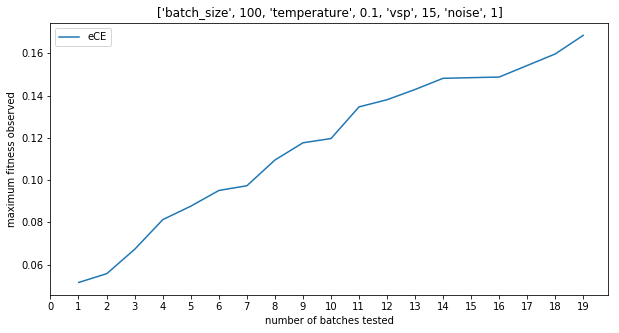

In [38]:
plt.figure(figsize=(10,5))
#plt.xscale("log")
plt.title(["batch_size",batch_size,"temperature",temperature,"vsp",virtual_per_measure_ratio,"noise",noise_alpha])
plt.xlabel("number of batches tested")
plt.ylabel("maximum fitness observed")
plt.plot([t[2]/batch_size for t in eCE.top_sequence[1:]],[t[0] for t in eCE.top_sequence[1:]],label="eCE")

plt.legend()
plt.xticks(range(generations));

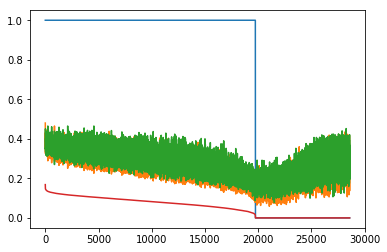

In [39]:
plt.plot(noisy_landscape.model.break_down_fitness_and_sort())